In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np

### Загрузка данных

In [92]:
def dateparse(x):
    if len(x) > 37:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M:%S')
    else:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M')

df_test = pd.read_csv('test_1_result.csv', sep=';', parse_dates=['Timestamp'], date_parser=dateparse)

In [93]:
def dateparse(x):
    return datetime.datetime.strptime(x, '%d.%m.%y %H:%M')
df_hours = pd.read_csv('scen_1_forecast_so_ko_hours.csv', sep=';', parse_dates=['dt'], date_parser=dateparse)

In [94]:
#группировка по 1H
load_1H = df_test.groupby(pd.Grouper(key='Timestamp', freq="1h")).mean().shift(1).fillna(0).reset_index(drop=False)


In [95]:
df_test.head()

,Timestamp,Power from grid,Solar power,Accum set point,Stored energy
0,2021-06-01 00:00:00,360.448433,0.0,1.0,156.100000
1,2021-06-01 00:00:01,363.788956,0.0,2.0,156.099698
2,2021-06-01 00:00:02,367.707662,0.0,3.0,156.099094
3,2021-06-01 00:00:03,360.517521,0.0,4.0,156.098188
4,2021-06-01 00:00:04,356.905777,0.0,5.0,156.096981


In [96]:
load_1H.tail()

,Timestamp,Power from grid,Solar power,Accum set point,Stored energy
287,2021-06-12 23:00:00,454.079202,0.0,2.761721e-13,100.0
288,2021-06-13 00:00:00,423.620844,0.0,3.130974e-13,100.0
289,2021-06-13 01:00:00,389.439145,0.0,7.688498e-14,100.0
290,2021-06-13 02:00:00,385.329290,0.0,7.949173e-14,100.0
291,2021-06-13 03:00:00,384.029567,0.0,8.228147e-14,100.0


In [97]:
df_hours.tail()

,dt,so_h_forec,ko_h_forec,max.consumption
715,2021-06-30 19:00:00,1,0.0,0
716,2021-06-30 20:00:00,1,0.0,0
717,2021-06-30 21:00:00,0,0.0,0
718,2021-06-30 22:00:00,0,0.0,0
719,2021-06-30 23:00:00,0,0.0,0


In [98]:
load_fact=load_1H['Power from grid'].reset_index(drop=True)
load_DR=df_hours['max.consumption'].reset_index(drop=True)
#print(load_DR, load_fact)
#массив с величинами снижения
DR = np.where(load_DR!=0, load_DR-load_fact, 0)
print(type(DR))
DR = pd.DataFrame(DR)
load_1H['DR_decrease']=DR
load_1H['max.consumption']=load_DR
load_1H.head(500)

<class 'numpy.ndarray'>


,Timestamp,Power from grid,Solar power,Accum set point,Stored energy,DR_decrease,max.consumption
0,2021-06-01 00:00:00,0.000000,0.0,0.000000e+00,0.000000,0.0,0
1,2021-06-01 01:00:00,336.866773,0.0,7.955600e+00,151.772085,0.0,0
2,2021-06-01 02:00:00,330.309349,0.0,7.848323e+00,143.177144,0.0,0
3,2021-06-01 03:00:00,284.223965,0.0,7.712141e+00,134.718077,0.0,0
4,2021-06-01 04:00:00,281.126405,0.0,7.544619e+00,126.422821,0.0,0
...,...,...,...,...,...,...,...
287,2021-06-12 23:00:00,454.079202,0.0,2.761721e-13,100.000000,0.0,0
288,2021-06-13 00:00:00,423.620844,0.0,3.130974e-13,100.000000,0.0,0
289,2021-06-13 01:00:00,389.439145,0.0,7.688498e-14,100.000000,0.0,0
290,2021-06-13 02:00:00,385.329290,0.0,7.949173e-14,100.000000,0.0,0


### Общий график

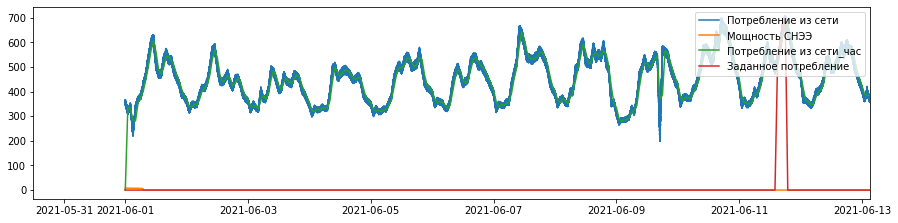

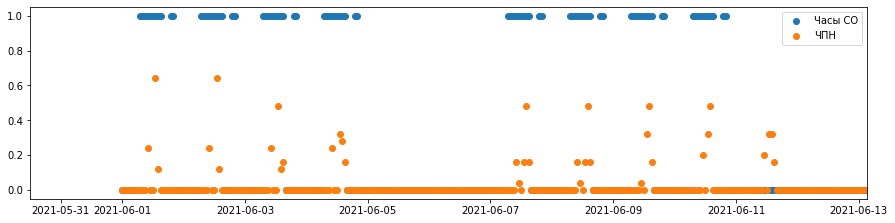

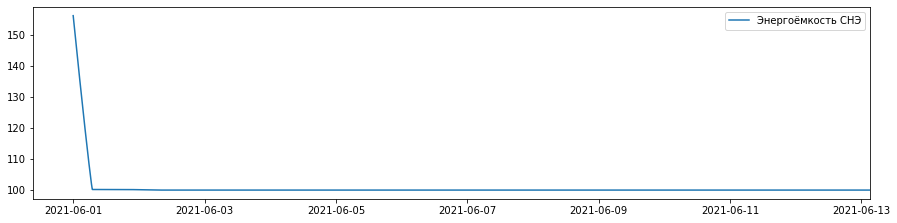

In [104]:
start_date = df_test.Timestamp[0]
end_date = df_test.Timestamp[len(df_test) - 1]


plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
#plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.plot(load_1H['Timestamp'], load_1H['Power from grid'], label='Потребление из сети_час')
plt.plot(df_hours['dt'], df_hours['max.consumption'], label='Заданное потребление')
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

### График на определённый день

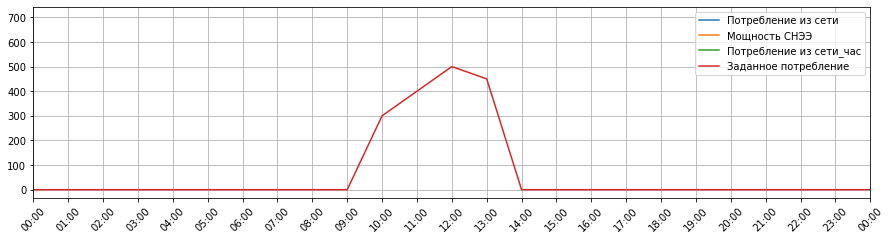

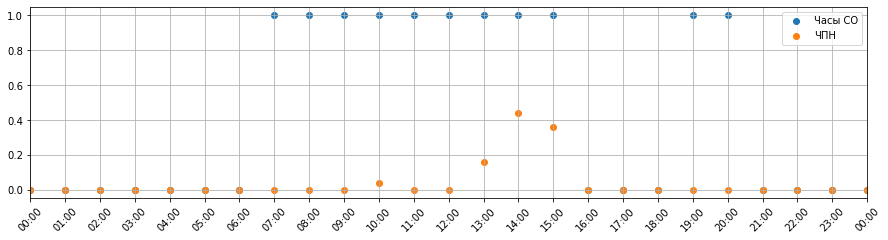

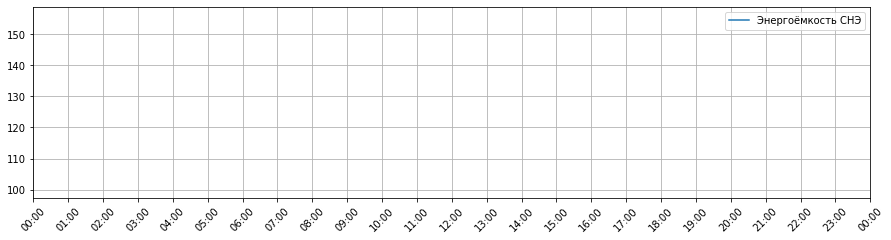

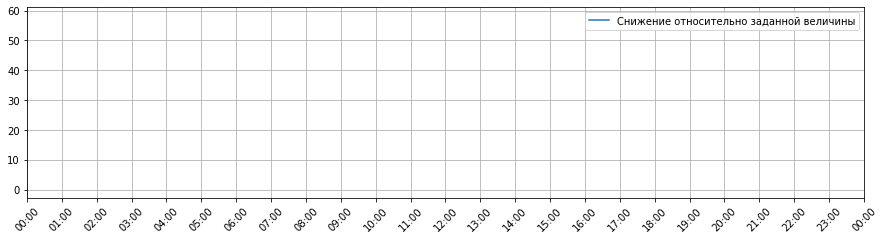

In [105]:
# Номер дня
day_number = 18

start_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number - 1)
end_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number)

myFmt = mdates.DateFormatter('%H:%M')

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
#plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.plot(load_1H['Timestamp'], load_1H['Power from grid'], label='Потребление из сети_час')
plt.plot(df_hours['dt'], df_hours['max.consumption'], label='Заданное потребление')
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2).xaxis.set_major_formatter(myFmt)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(load_1H['Timestamp'], load_1H['DR_decrease'], label='Снижение относительно заданной величины')
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()